In [2]:
#Problem statement 
#Using clustering algorithms to categorize similar players using their traits and their different skills in the field.

In [3]:
#importing packages 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
EDA_Data=pd.read_csv('players_20.csv')

In [6]:
EDA_Data.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


In [7]:
EDA_Data.shape

(18278, 104)

In [8]:
EDA_Data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [9]:
#EDA

In [9]:
EDA_Data['nationality'].value_counts().head()

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: nationality, dtype: int64

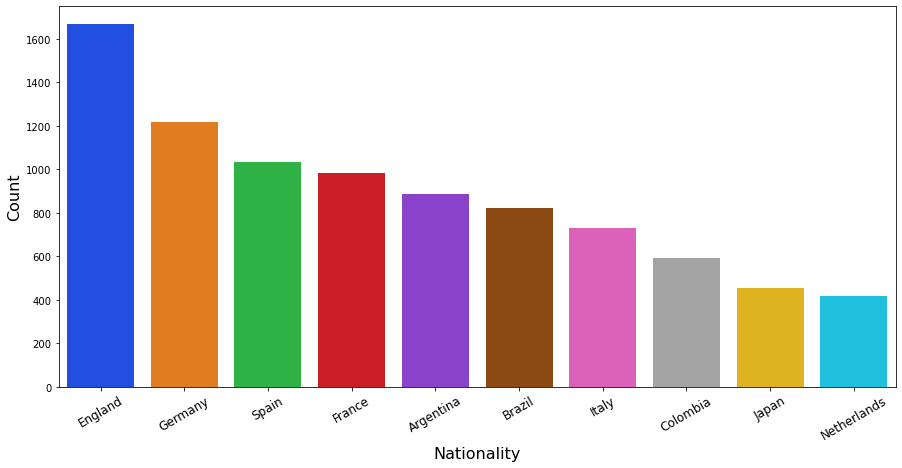

In [10]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='nationality',data=EDA_Data,palette='bright',order=EDA_Data.nationality.value_counts().iloc[:10].index)
ax.set_xlabel(xlabel='Nationality',fontsize=16)
ax.set_ylabel(ylabel='Count',fontsize=16)
plt.xticks(rotation=30,fontsize=12)
plt.show()

In [12]:
#Count of players belongs to England nationality is high and foloowed by Germany ,spain ,France so on.

In [11]:
#Age distribution of players 

EDA_Data['age'].value_counts()

22    1446
21    1375
23    1358
27    1324
25    1319
24    1296
26    1270
20    1247
28    1086
19    1011
29     999
30     883
31     807
18     640
32     597
33     475
35     310
34     301
17     229
36     131
37      81
38      42
39      20
40      13
16      12
41       4
42       2
Name: age, dtype: int64

<AxesSubplot:title={'center':'Age Distribution of Players in FIFA20'}, xlabel='age', ylabel='Density'>

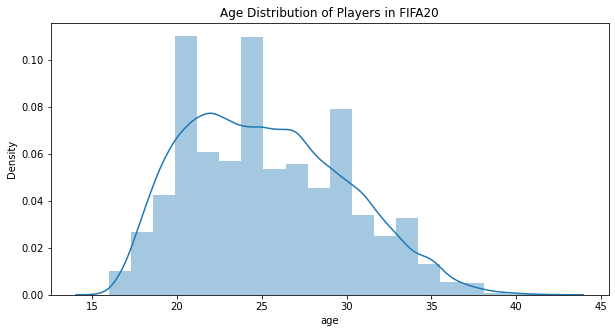

In [12]:
plt.figure(figsize=(10,5))
plt.title('Age Distribution of Players in FIFA20')
sns.distplot(a=EDA_Data['age'],kde=True,bins=20)
# Age distribution ranges from 22 to 42 

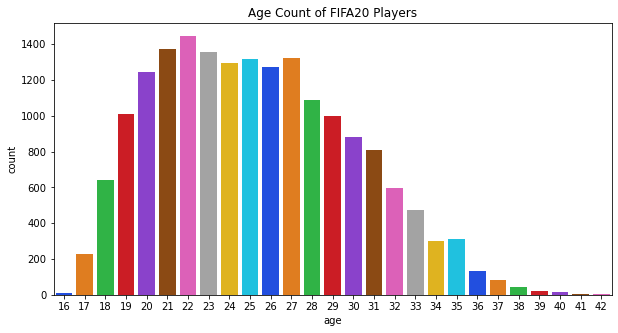

In [13]:
plt.figure(figsize=(10,5))
plt.title('Age Count of FIFA20 Players')
Age=sns.countplot(x='age',data=EDA_Data,palette='bright')
#Age count of players

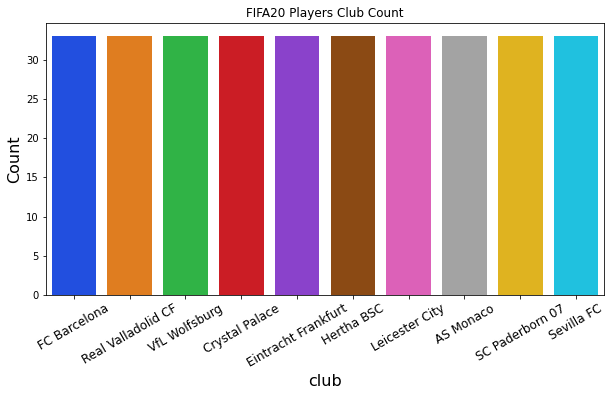

In [14]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='club',data=EDA_Data,palette='bright',order=EDA_Data.club.value_counts().iloc[:10].index)
plt.title('FIFA20 Players Club Count')
ax.set_xlabel(xlabel='club',fontsize=16)
ax.set_ylabel(ylabel='Count',fontsize=16)
plt.xticks(rotation=30,fontsize=12)
plt.show()
#Players club count 

<AxesSubplot:title={'center':'Height Distribution of FIFA20 Players'}, xlabel='height_cm', ylabel='Density'>

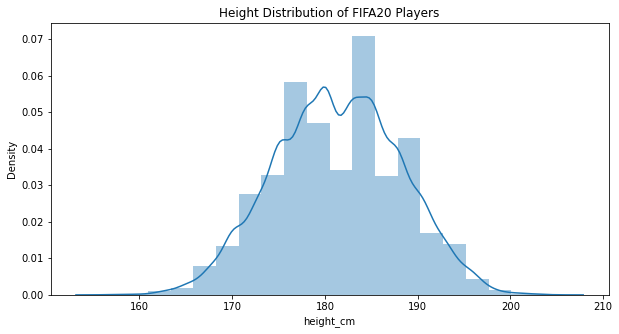

In [15]:
plt.figure(figsize=(10,5))
plt.title('Height Distribution of FIFA20 Players')
sns.distplot(a=EDA_Data['height_cm'],kde=True,bins=20)
#Height distribution of players

<AxesSubplot:title={'center':'Preferred foot count of FIFA20 Players'}, xlabel='preferred_foot', ylabel='count'>

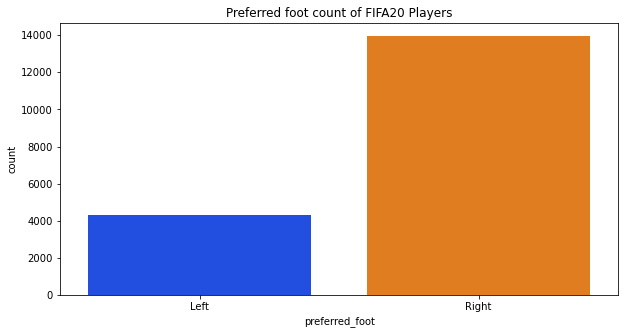

In [16]:
plt.figure(figsize=(10,5))
plt.title('Preferred foot count of FIFA20 Players')
sns.countplot(x='preferred_foot',data=EDA_Data,palette='bright')
#preferred foot of the players

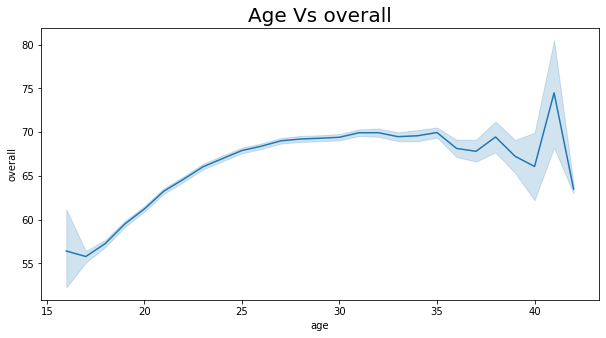

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(EDA_Data['age'],EDA_Data['overall'],palette='Wistia')
plt.title('Age Vs overall',fontsize=20)
plt.show()
#Age vs Overall
#Below graph we observed that the players are improving with of the years. 
#The best players are 30 years old and after that they start to decline.
#and also seen that in the 40 age there is a peak in the performance and dip after that.

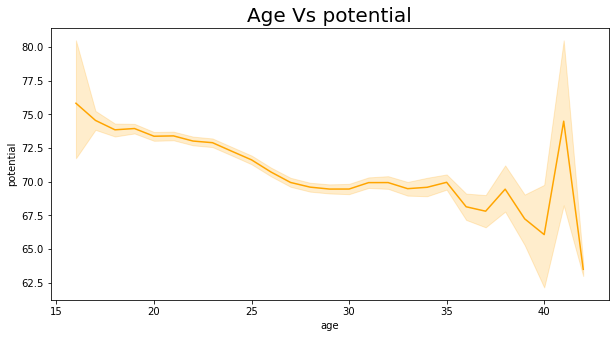

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(EDA_Data['age'],EDA_Data['potential'],palette='Wistia',color='orange')
plt.title('Age Vs potential',fontsize=20)
plt.show()
#Age vs potential 
#Age group between 20-30 has more potential and eventually players above 35 have higher potentials and reduced going further.

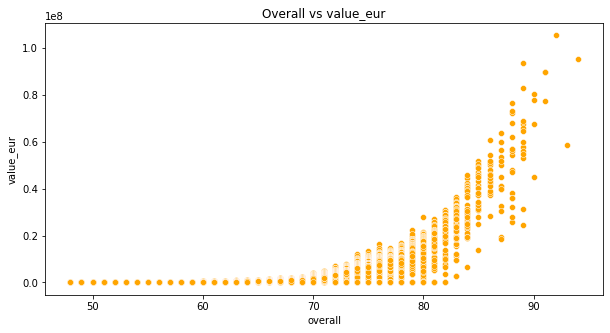

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='overall',y='value_eur',data=EDA_Data,color='orange')
plt.title('Overall vs value_eur')
plt.show()
#Overall vs value_eur

In [22]:
#Analysis of goalkeepr 
data_gk=EDA_Data.loc[EDA_Data['team_position']=='GK']
data_gk.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_gk.isnull().sum()

sofifa_id       0
player_url      0
short_name      0
long_name       0
age             0
             ... 
lb            662
lcb           662
cb            662
rcb           662
rb            662
Length: 104, dtype: int64

In [24]:
data_gk['age'].value_counts().head()

26    59
28    57
27    55
30    52
25    41
Name: age, dtype: int64

<AxesSubplot:title={'center':'Age distribution of Goalkeeprs in FIFA20'}, xlabel='age', ylabel='Density'>

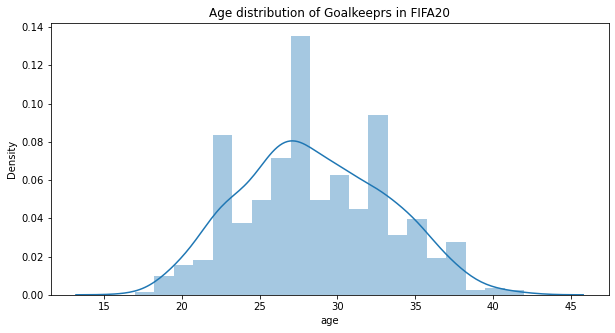

In [25]:
plt.figure(figsize=(10,5))
plt.title('Age distribution of Goalkeeprs in FIFA20')
sns.distplot(a=data_gk['age'],kde=True,bins=20)

<AxesSubplot:title={'center':'Overall Distribution of Goalkeepr Players'}, xlabel='overall', ylabel='Density'>

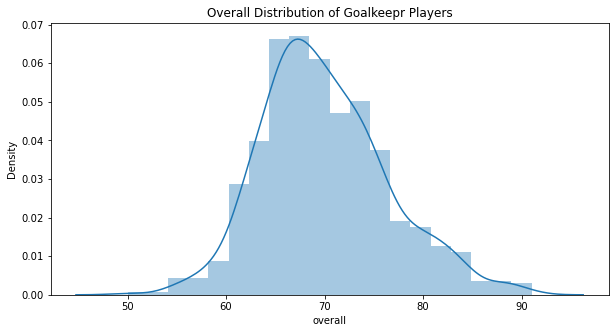

In [26]:
plt.figure(figsize=(10,5))
plt.title('Overall Distribution of Goalkeepr Players')
sns.distplot(a=data_gk['overall'],kde=True,bins=20)
#Overall distribution of goalkeepr 
#Goal keepers have overall value in the range 50-90, with a mean of 69.

<AxesSubplot:title={'center':'Wage_eur distribution of Goalkeeprs'}, xlabel='wage_eur', ylabel='Density'>

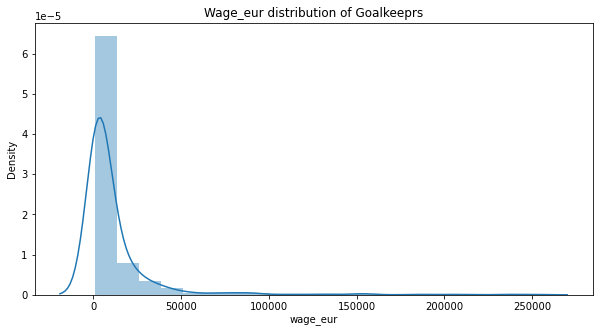

In [27]:
plt.figure(figsize=(10,5))
plt.title('Wage_eur distribution of Goalkeeprs')
sns.distplot(a=data_gk['wage_eur'],kde=True,bins=20)
#wage distribution of Goalkeeprs

In [29]:
data=pd.read_csv('players_20.csv')
data.head(1)
data.shape

(18278, 104)

In [30]:
data = data[['age', 'height_cm', 'weight_kg', 'overall', 'potential',
'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
'skill_moves', 'release_clause_eur', 'team_jersey_number',
'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
'gk_positioning', 'attacking_crossing', 'attacking_finishing',
'attacking_heading_accuracy', 'attacking_short_passing',
'attacking_volleys', 'skill_dribbling', 'skill_curve',
'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
'movement_reactions', 'movement_balance', 'power_shot_power',
'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
'mentality_aggression', 'mentality_interceptions',
'mentality_positioning', 'mentality_vision', 'mentality_penalties',
'mentality_composure', 'defending_marking', 'defending_standing_tackle',
'defending_sliding_tackle', 'goalkeeping_diving',
'goalkeeping_handling', 'goalkeeping_kicking',
'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [31]:
data = data[data.overall > 85] 
# extracting players with overall above 85

In [32]:
data = data.fillna(data.mean())

In [33]:
from sklearn import preprocessing
x = data.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [35]:
from sklearn.cluster import KMeans
# specify the number of clusters
kmeans = KMeans(n_clusters=5)
# fit the input data
kmeans = kmeans.fit(reduced)
# get the cluster labels
labels = kmeans.predict(reduced)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()

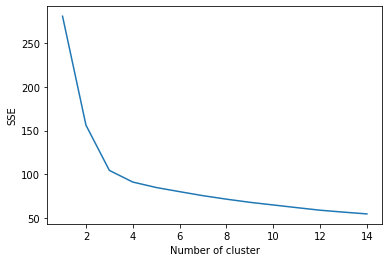

In [38]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_norm)
    X_norm["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [37]:
reduced['cluster'] = clusters
reduced.columns = ['x', 'y', 'cluster']
reduced.head()

,x,y,cluster
0,-1.332410,-1.344567,4
1,-1.021370,-0.995609,4
2,-1.207853,-1.498127,4
3,3.075986,-0.784658,1
4,-1.086549,-1.283309,4


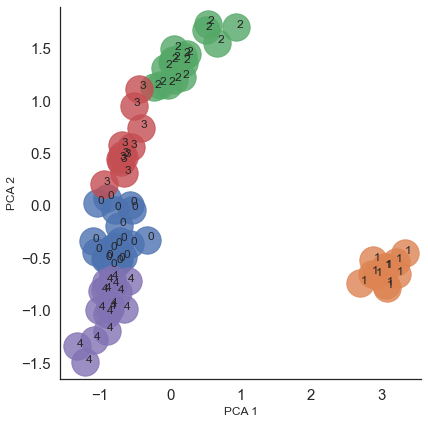

In [39]:
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, size = 6,legend=False,fit_reg=False, scatter_kws={"s": 750})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.cluster):
    texts.append(plt.text(x, y, s))


plt.tick_params(labelsize=15)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.show()

In [41]:
from sklearn.metrics import silhouette_score

silhouette_score(reduced , labels)

0.8142396784300375